In [ ]:
!pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.0 MB/s eta 0:00:00


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a, b) #error porque no no concuerdan las matrices

NameError: ignored

**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    if(len(A[0])==len(B)):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print('Las matrices no son compatibles para multiplicar')

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a ,b)

NameError: ignored

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[3,5],
     [6,8],
     [9,4]]

b = [[1,8,4],
     [9,6,6]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(a, b)

[[48, 54, 42], [78, 96, 72], [45, 96, 60]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

1.9830882080938221

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.6510174062799634, 0.7875153262713741, 0.860268004939184],
 [0.1178984493727332, 0.15693816461008347, 0.15058779004637557]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
randa=random_matrix(600,100)
randb=random_matrix(100,600)

In [ ]:
%%time

for i in range(10):
  matmul(randa, randb)

NameError: ignored

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['Lenguaje'] = None
df['Tiempo promedio (s)'] = None

row = pd.Series(['Python', 117/10], index=df.columns)
df = df.append(row, ignore_index=True)

In [ ]:
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.7


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
%%time
import numpy as np

for i in range(10):
  np.dot(randa, randb)

NameError: ignored

In [ ]:
def appendrow(x, something):
  row = pd.Series(something, index=x.columns)
  x = x.append(row, ignore_index=True)
  return(x)

df= appendrow(df, ['Numpy', 0.216/10])

In [ ]:
print(df)

  Lenguaje  Tiempo promedio (s)
0   Python              11.7000
1    Numpy               0.0216


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

NameError: ignored

In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

NameError: ignored

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[7, 9],
     [6, 3]]

B = [[5, 4],
     [8, 2]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(xs,ys, n, m, result)
    integer, intent(in) :: n, m
    double precision, intent(in) :: xs(n,*)
    double precision, intent(in) :: ys(m,*)
    double precision, intent(out) :: result(n,n)
    do I=1,n
      do J=1,n
        S=0
        do K=1,m
          S = S + xs(I,K) * ys(K,J)
        end do
        result(I, J)= S
      end do
    end do
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
fortran_matmul(A, B, 2, 2)

array([[107.,  46.],
       [ 54.,  30.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
mat1 = np.array(random_matrix(600, 100))
mat2 = np.array(random_matrix(100, 600))

n=len(mat1)
m=len(mat1[0])

fortran_matmul(mat1, mat2, 600, 100)

array([[25.73040199, 26.83059883, 25.90285301, ..., 24.32797241,
        22.41807365, 24.42670059],
       [25.9316597 , 27.22881508, 26.29411507, ..., 24.52013206,
        24.62499428, 25.1286602 ],
       [25.79860687, 28.55996704, 25.83285713, ..., 24.62169266,
        23.72857857, 27.34114075],
       ...,
       [25.81793213, 27.52725792, 24.54131889, ..., 22.91325378,
        23.78382111, 25.29034233],
       [27.82685661, 26.95960617, 26.68063354, ..., 22.80784988,
        23.71689224, 27.28041267],
       [28.96362686, 28.12902832, 26.14252853, ..., 23.78333855,
        24.46012115, 27.61406517]])

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
import time

fortimemagic = 0
for i in range(10):
  start = time.time()
  fortran_matmul(mat1,mat2,n, m)
  v = time.time() - start
  fortimemagic += v
fortimemagic/= 10
print(fortimemagic)

0.177947998046875


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
df= appendrow(df, ['Fortran Magic', fortimemagic])
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948


In [ ]:
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran
subroutine fortran_matmul10(xs,ys, n, m, result)
    integer, intent(in) :: n, m
    double precision, intent(in) :: xs(n,*)
    double precision, intent(in) :: ys(m,*)
    double precision, intent(out) :: result(n,n)
    do H= 1, 10
      do I=1,n
        do J=1,n
          S=0
          do K=1,m
            S = S + xs(I,K) * ys(K,J)
          end do
          result(I, J)= S
        end do
      end do
    end do
end

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
fortime = 0
for i in range(10):
  start = time.time()
  fortran_matmul10(mat1,mat2,n, m)
  v = time.time() - start
  fortime += v
fortime/= 10
print(fortime)

1.8123728036880493


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
df= appendrow(df, ['Fortran', fortime])
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948
3,Fortran,1.812373


In [ ]:
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948
3,Fortran,1.812373


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile PRUEBA.c
#include <stdio.h>        
#include <stdlib.h>
#include <stdio.h>
#include <time.h> 
#define n 600
#define m 100
void multiplicar(int a[n][m],int b[m][n]){
    float suma;
    float c[n][n];
    for (int x = 0; x < n; x++) {
        // Dentro recorremos las filas de la primera (A)
        for (int i = 0; i < n; i++){ 
            suma =0;
            // Y cada columna de la primera (A)
            for (int j = 0; j < m; j++) {
                // Multiplicamos y sumamos resultado
                suma += a[i][j] * b[j][x];
            }
            // Lo acomodamos dentro del producto
            c[i][x] = suma;     
        }
    }

}
int main(void) {
    //matriz a
    double time_spent = 0.0;
    int matrizA[600][100];
    for(int x=0;x<600;x++){
        for(int y=0;y<100;y++){
            matrizA[x][y]=rand()%100;
        }   
    }

    int matrizB[100][600];
    for(int x=0;x<100;x++){
        for(int y=0;y<600;y++){
            matrizB[x][y]=rand()%100;
        }   
    }
    clock_t begin = clock();
    for(int x=0;x<10;x++){
        multiplicar(matrizA,matrizB);    
    }
    
    clock_t end = clock();
    time_spent += (double)((end - begin)/10) / CLOCKS_PER_SEC;
    printf("average execution time is %f seconds", time_spent);
  
    return 0;
}

Overwriting PRUEBA.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!ls -l

total 8
-rw-r--r-- 1 root root 1274 Mar  8 10:53 PRUEBA.c
drwxr-xr-x 1 root root 4096 Mar  6 17:52 sample_data


In [ ]:
%%shell

gcc PRUEBA.c -o output

In [ ]:
%%shell

./output

average execution time is 0.174111 seconds

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
row = pd.Series(['c', 0.174111], index=df.columns)
df = df.append(row, ignore_index=True)

In [ ]:
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948
3,Fortran,1.812373
4,c,0.174111


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile PRUEBA.c++
#include <iostream>
#include <cstdlib>
#include <ctime>

using namespace std;

const int ROWS_A = 600;
const int COLS_A = 100;
const int ROWS_B = 100;
const int COLS_B = 600;

int main() {
    int A[ROWS_A][COLS_A];
    int B[ROWS_B][COLS_B];
    int C[ROWS_A][COLS_B];
    int i, j, k;

    srand(time(NULL));

    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i][j] = rand() % 10;
        }
    }

    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i][j] = rand() % 10;
        }
    }

    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_B; j++) {
            C[i][j] = 0;
            for (k = 0; k < COLS_A; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
            C[i][j] *= 10;
        }
    }

    return 0;
}

Writing PRUEBA.c++


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!ls -l

total 40
-rw-r--r-- 1 root root   762 Mar  8 11:02 Main.java
-rw-r--r-- 1 root root   826 Mar  8 11:05 matmul.c++
-rwxr-xr-x 1 root root 16872 Mar  8 10:54 output
-rw-r--r-- 1 root root  1274 Mar  8 11:01 PRUEBA.c
-rw-r--r-- 1 root root   826 Mar  8 11:05 PRUEBA.c++
drwxr-xr-x 1 root root  4096 Mar  6 17:52 sample_data


In [ ]:
%%timeit -r 10
%%shell

g++ matmul.c++ -o output++

356 ms ± 49.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df = appendrow(df, ['C++', 0.356])
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948
3,Fortran,1.812373
4,c,0.174111
5,Java,1.250000
6,C++,0.356000


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java

public class Main {
    public static void main(String args[]) {
      
      int[][] A = new int[600][100];
      for (int i = 0; i < A.length; i++) {
          for (int j = 0; j < A[i].length; j++) {
             A[i][j] = (int) (Math.random()*9);
         }
      }

      int[][] B = new int[100][600];
      for (int i = 0; i < B.length; i++) {
          for (int j = 0; j < B[i].length; j++) {
             B[i][j] = (int) (Math.random()*9);
         }
      }

      int[][] C = new int[A.length][B[0].length];
      
      for (int i = 0; i < C.length; i++){
        for (int j = 0; j < C[0].length; j++){
          for (int k = 0; k < B.length; k++){
            C[i][j] = C[i][j] + A[i][k] * B[k][j];
          }
        }
      }
        
  
    }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%timeit -r 10

!java Main.java

929 ms ± 29.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
df = appendrow(df, ['Java', 1.25])
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948
3,Fortran,1.812373
4,c,0.174111
5,Java,1.250000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile jscript.js
function NeedMatr(r, c) {

    const matr = new Array(r);

    for (let i = 0; i < matr.length; i++) {
        matr[i] = new Array(c);
    }
    
    for(let i  = 0 ; i < matr.length; i++){
        for(let j = 0; j < matr[0].length; j++){
            matr[i][j] = Math.random()
        }
    }

    return matr;
}

function matmul(xs, ys){

    finalmatr = NeedMatr(xs.length, ys[0].length)
    
    for (let i = 0; i < xs.length; i++){
        for (let j = 0; j <ys[0].length; j++){
            for(let k = 0; k < ys.length; k++ ){
                finalmatr[i][j] += xs[i][k] * ys[k][j]
            }
        } 
    }
            
    return finalmatr
}

const M1= NeedMatr(600, 100)
const M2= NeedMatr(100, 600)

const stime = Date.now();
for(let i = 0; i< 10; i++){
    matmul(NeedMatr(600, 100), NeedMatr(100, 600))
}
const ftime= Date.now() - stime

console.log("Result time:", ftime/10000)

Writing jscript.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node jscript.js

Result time: 0.2548


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
df = appendrow(df, ['JavaScript', 0.2262])
df

,Lenguaje,Tiempo promedio (s)
0,Python,11.700000
1,Numpy,0.021600
2,Fortran Magic,0.177948
3,Fortran,1.812373
4,c,0.174111
5,Java,1.250000
6,C++,0.356000
7,JavaScript,0.226200


**My own example 31 - Finding the minimun average execuiton time in the data frame**

In [ ]:
mintime= df["Tiempo promedio (s)"].min()

print("Minimum time: ", mintime)

Minimum time:  0.0216


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
ls= []
for i in list(df["Tiempo promedio (s)"]) : ls.append(round(i/mintime, 2))

df["Factor de Velocidad"]= ls
df

,Lenguaje,Tiempo promedio (s),Factor de Velocidad
0,Python,11.700000,541.67
1,Numpy,0.021600,1.00
2,Fortran Magic,0.177948,8.24
3,Fortran,1.812373,83.91
4,c,0.174111,8.06
5,Java,1.250000,57.87
6,C++,0.356000,16.48
7,JavaScript,0.226200,10.47


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(["Factor de Velocidad"])
df = df.reset_index(drop=True)
#del df["Factor de Velocidad (s)"]
df

,Lenguaje,Tiempo promedio (s),Factor de Velocidad
0,Python,11.700000,541.67
1,Numpy,0.021600,1.00
2,Fortran Magic,0.177948,8.24
3,Fortran,1.812373,83.91
4,c,0.174111,8.06
5,Java,1.250000,57.87
6,C++,0.356000,16.48
7,JavaScript,0.226200,10.47


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(data * data).sum()

CPU times: user 99 µs, sys: 6 µs, total: 105 µs
Wall time: 109 µs


30

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.939375653238838

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

NameError: ignored

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

NameError: ignored

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

**My own example 34 importar datos del gobierno de Colombia**

https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Evaluaciones-Agropecuarias-Municipales-EVA/2pnw-mmge/explore/query/SELECT%0A%20%20%60c_d_dep%60%2C%0A%20%20%60departamento%60%2C%0A%20%20%60c_d_mun%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60grupo_de_cultivo%60%2C%0A%20%20%60subgrupo_de_cultivo%60%2C%0A%20%20%60cultivo%60%2C%0A%20%20%60desagregaci_n_regional_y%60%2C%0A%20%20%60a_o%60%2C%0A%20%20%60periodo%60%2C%0A%20%20%60rea_sembrada_ha%60%2C%0A%20%20%60rea_cosechada_ha%60%2C%0A%20%20%60producci_n_t%60%2C%0A%20%20%60rendimiento_t_ha%60%2C%0A%20%20%60estado_fisico_produccion%60%2C%0A%20%20%60nombre_cientifico%60%2C%0A%20%20%60ciclo_de_cultivo%60/page/filter

In [ ]:
import pandas as pd
info =pd.read_csv("Evaluaciones_Agropecuarias_Municipales_EVA.csv",decimal=',')
info

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006.0,2006B,2.0,1.0,1.0,1,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006.0,2006B,82.0,80.0,1440.0,18,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006.0,2006B,2.0,2.0,26.0,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006.0,2006B,3.0,3.0,48.0,16,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006.0,2006B,1.0,1.0,5.0,10,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161524,76,VALLE DEL CAUCA,76100,BOLIVAR,HORTALIZAS,PIMENTON,PIMENTON,PIMENTON,2017.0,2017B,66.0,66.0,1482.0,22.45,HORTALIZA FRESCA,CAPSICUM ANNUM,TRANSITORIO
161525,76,VALLE DEL CAUCA,76250,EL DOVIO,HORTALIZAS,PIMENTON,PIMENTON,PIMENTON,2017.0,2017B,51.0,51.0,923.0,18,HORTALIZA FRESCA,CAPSICUM ANNUM,TRANSITORIO
161526,76,VALLE DEL CAUCA,76606,RESTREPO,HORTALIZAS,PIMENTON,PIMENTON,PIMENTON,2017.0,2017B,48.0,48.0,576.0,12,HORTALIZA FRESCA,CAPSICUM ANNUM,TRANSITORIO
161527,76,VALLE DEL CAUCA,76622,ROLDANILLO,HORTALIZAS,PIMENTON,PIMENTON,PIMENTON,2017.0,2017B,22.0,22.0,594.0,27,HORTALIZA FRESCA,CAPSICUM ANNUM,TRANSITORIO


<AxesSubplot:>

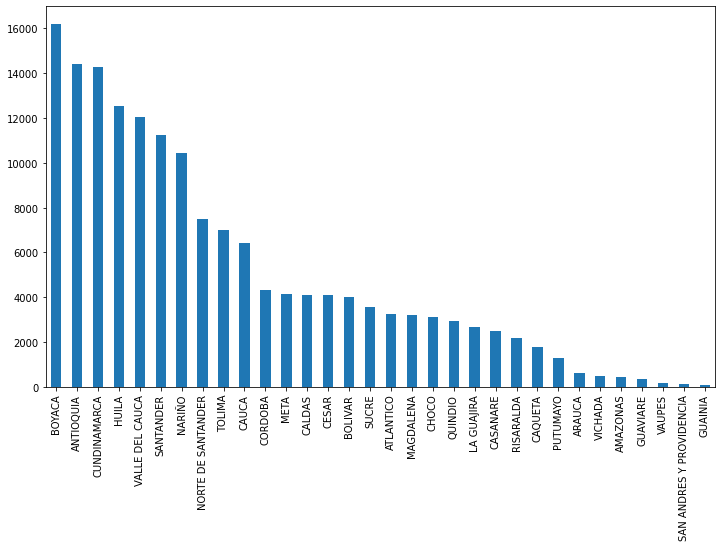

In [ ]:
info["DEPARTAMENTO"].value_counts().plot(kind='bar')


Observamos que se tiene mas informacion sobre evaluaciones agropecuarias municipales de Boyaca, Antioquia y Cundinamarca, que de departamentos menos poblados como Guainia, Vaupes o Guaviare

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: ignored

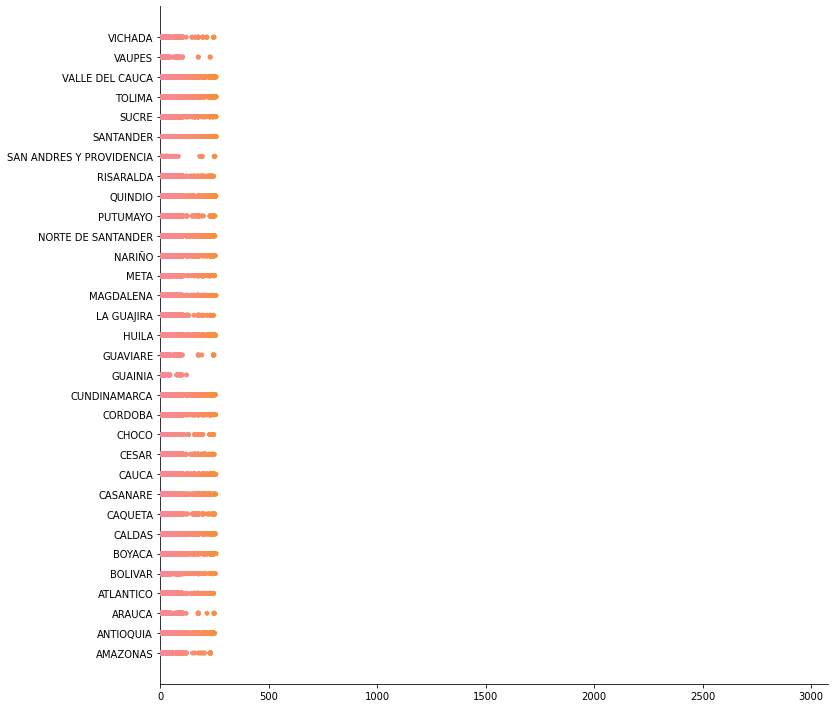

In [ ]:
sns.catplot(x='Rendimiento\n(t/ha)', y='DEPARTAMENTO', kind='swarm', data= info, size=10)

In [ ]:

info.sort_values(by='Rendimiento\n(t/ha)', ascending=False)

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
45666,19,CAUCA,19513,PADILLA,OTROS PERMANENTES,CAÑA,CAÑA AZUCARERA,CAÑA AZUCARERA,2011.0,2011,5592.0,5075.0,506390.0,99.78,CAÑA PARA MOLIENDA,SACCHARUM OFFICINARUM,PERMANENTE
45757,76,VALLE DEL CAUCA,76041,ANSERMANUEVO,OTROS PERMANENTES,CAÑA,CAÑA AZUCARERA,CAÑA AZUCARERA,2012.0,2012,2006.0,1823.0,181805.0,99.73,CAÑA PARA MOLIENDA,SACCHARUM OFFICINARUM,PERMANENTE
45573,66,RISARALDA,66400,LA VIRGINIA,OTROS PERMANENTES,CAÑA,CAÑA AZUCARERA,CAÑA AZUCARERA,2009.0,2009,251.0,234.0,23294.0,99.55,CAÑA PARA MOLIENDA,SACCHARUM OFFICINARUM,PERMANENTE
45598,76,VALLE DEL CAUCA,76403,LA VICTORIA,OTROS PERMANENTES,CAÑA,CAÑA AZUCARERA,CAÑA AZUCARERA,2009.0,2009,1028.0,953.0,94801.0,99.48,CAÑA PARA MOLIENDA,SACCHARUM OFFICINARUM,PERMANENTE
45886,19,CAUCA,19698,SANTANDER DE QUILICHAO,OTROS PERMANENTES,CAÑA,CAÑA AZUCARERA,CAÑA AZUCARERA,2015.0,2015,6229.0,5350.0,531077.0,99.27,CAÑA PARA MOLIENDA,SACCHARUM OFFICINARUM,PERMANENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157141,44,LA GUAJIRA,44090,DIBULLA,FRUTALES,PATILLA,PATILLA,PATILLA,2015.0,2015B,60.0,0.0,0.0,NaN,FRUTO FRESCO,CITRULLUS VULGARIS,TRANSITORIO
158223,23,CORDOBA,23350,LA APARTADA,HORTALIZAS,PEPINO,PEPINO COHOMBRO,PEPINO COHOMBRO,2010.0,2010B,4.0,0.0,0.0,NaN,HORTALIZA FRESCA,CUCUMIS SATIVUS,TRANSITORIO
158448,17,CALDAS,17442,MARMATO,HORTALIZAS,PEPINO,PEPINO COHOMBRO,PEPINO COHOMBRO,2012.0,2012B,0.0,0.0,0.0,NaN,HORTALIZA FRESCA,CUCUMIS SATIVUS,TRANSITORIO
160405,63,QUINDIO,63548,PIJAO,HORTALIZAS,PIMENTON,PIMENTON,PIMENTON,2011.0,2011A,1.0,0.0,0.0,NaN,HORTALIZA FRESCA,CAPSICUM ANNUM,TRANSITORIO


In [ ]:
info['DEPARTAMENTO'].describe()

count     161529
unique        32
top       BOYACA
freq       16181
Name: DEPARTAMENTO, dtype: object

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!